In [1]:
import numpy as np
import pandas as pd 

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [6]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True).astype(int)

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0,1,1,1,101348,1,0,0,0
1,608,41,1,83807,1,0,1,112542,0,0,1,0
2,502,42,8,159660,3,1,0,113931,1,0,0,0
3,699,39,1,0,2,0,0,93826,0,0,0,0
4,850,43,2,125510,1,1,1,79084,0,0,1,0


In [12]:
df.dtypes

CreditScore          int64
Age                  int64
Tenure               int64
Balance              int64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary      int64
Exited               int64
Geography_Germany    int64
Geography_Spain      int64
Gender_Male          int64
dtype: object

In [13]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [15]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146,2,0,1,124749,1,0,1
5140,626,29,4,105767,2,0,0,41104,0,0,0
2568,612,47,6,130024,1,1,1,45750,1,0,0
3671,646,52,6,111739,2,0,1,68367,1,0,0
7427,714,33,8,122017,1,0,0,162515,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363,1,1,1,66799,1,0,1
7813,684,63,3,81245,1,1,0,69643,1,0,0
905,672,45,9,0,1,1,1,92027,0,0,0
5192,663,39,8,0,2,1,1,101168,0,0,0


In [16]:
y_train

2694    0
5140    0
2568    1
3671    0
7427    0
       ..
2895    0
7813    1
905     1
5192    0
235     1
Name: Exited, Length: 8000, dtype: int64

In [17]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [18]:
import tensorboard
import keras
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [19]:
model = Sequential()
model.add(Dense(11, activation='relu', input_dim=11))
model.add(Dense(11, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

c:\Users\vikas\OneDrive\Desktop\Deep-Learning-CampusX\campus\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


This code defines a simple neural network with three layers:

* **Input Layer:**
  * Takes 11 input features.
* **First Hidden Layer:**
  * Contains 11 neurons.
  * Uses the ReLU activation function.
* **Second Hidden Layer:**
  * Contains 11 neurons.
  * Uses the ReLU activation function.
* **Output Layer:**
  * Contains 1 neuron.
  * Uses the sigmoid activation function.

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [22]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100


200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5905 - loss: 0.6641 - val_accuracy: 0.7969 - val_loss: 0.5165
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7968 - loss: 0.4901 - val_accuracy: 0.8050 - val_loss: 0.4530
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8189 - loss: 0.4269 - val_accuracy: 0.8225 - val_loss: 0.4225
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8312 - loss: 0.4088 - val_accuracy: 0.8381 - val_loss: 0.3989
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8493 - loss: 0.3775 - val_accuracy: 0.8475 - val_loss: 0.3827
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8448 - loss: 0.3715 - val_accuracy: 0.8438 - val_loss: 0.3741
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8410 - loss: 0.3858 - val_accuracy: 0.8456 - val_loss: 0.3647
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8545 - loss: 0.3449 - val_accuracy: 0.8506

In [23]:
model.layers[0].get_weights()

[array([[ 0.05842694, -0.18004327, -0.601728  ,  0.03380239,  0.0300948 ,
          0.01502425, -0.14307867,  0.33886275, -0.23901579, -0.10109816,
          0.10434806],
        [ 0.5662532 ,  0.3472768 ,  0.4685916 ,  0.8976527 , -0.67005974,
          0.0643395 ,  1.2108328 , -0.18904962,  0.23742813,  0.2933681 ,
          0.30063063],
        [ 0.229941  , -0.18582979,  0.37803242,  0.16459544, -0.04081541,
          0.2319012 ,  0.10081176, -0.07062582, -0.16807672, -0.07776111,
         -0.04768534],
        [-0.06370692, -0.5283317 ,  0.1151041 , -0.16610648,  0.06017419,
         -0.9862998 , -0.3048155 , -0.6960917 , -0.01773301, -0.1259468 ,
         -0.18694802],
        [ 1.1896063 ,  0.73894525,  0.28903288,  0.6538776 , -0.13120902,
         -0.10354171, -0.9058319 , -0.11723155, -0.47283196, -0.2543639 ,
          1.0469162 ],
        [-0.10560021,  0.4633511 ,  0.25605384,  0.19818589, -0.26611066,
         -0.05361802, -0.01443617,  0.25202265,  0.44826773,  0.3413420

In [24]:
model.layers[1].get_weights()

[array([[-0.49112558, -1.1854981 ,  0.18067254,  0.5687441 ,  0.05176853,
         -1.1932242 ,  0.50968367, -1.1962082 ,  0.07607917, -0.10661768,
         -0.105795  ],
        [-0.4736786 , -1.5021865 ,  0.43490705, -0.7895766 , -0.2917081 ,
          0.3826821 ,  0.43045393,  0.16576724,  0.77773666,  0.19159034,
         -0.2245294 ],
        [-0.02293388,  0.48561427, -0.24437934,  0.14920598,  0.53183365,
         -0.33965388,  0.6125494 , -1.0668874 ,  0.47525835,  0.17845267,
         -0.26966748],
        [-0.792992  , -1.4648782 ,  0.66739136, -0.93654835,  0.470617  ,
         -0.3545373 ,  0.05782345, -1.3638337 , -0.16234384, -0.7006149 ,
          0.57580656],
        [-0.28252375,  0.3196552 , -0.12230754,  0.27137694,  0.4108312 ,
          0.11910551, -0.78756976, -0.638789  ,  0.36689866,  0.62463254,
          0.51358515],
        [ 0.39557478, -0.26316002,  0.46758914,  0.18377101, -0.1213974 ,
          0.70674175, -0.6881575 ,  0.49228248, -0.17920467,  0.3678788

In [25]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


In [26]:
y_pred = np.where(y_log>0.5,1,0)
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [27]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8625

In [28]:
import matplotlib.pyplot as plt

In [29]:
history.history

{'accuracy': [0.714062511920929,
  0.8053125143051147,
  0.8189062476158142,
  0.8329687714576721,
  0.8417187333106995,
  0.8460937738418579,
  0.8495312333106995,
  0.8514062762260437,
  0.8571875095367432,
  0.8559374809265137,
  0.8618749976158142,
  0.858593761920929,
  0.8590624928474426,
  0.8598437309265137,
  0.8621875047683716,
  0.8610937595367432,
  0.8621875047683716,
  0.8626562356948853,
  0.8639062643051147,
  0.8635937571525574,
  0.8651562333106995,
  0.8642187714576721,
  0.864062488079071,
  0.8659374713897705,
  0.8639062643051147,
  0.86328125,
  0.864062488079071,
  0.8642187714576721,
  0.8646875023841858,
  0.8642187714576721,
  0.8634374737739563,
  0.86328125,
  0.8654687404632568,
  0.8642187714576721,
  0.8631250262260437,
  0.864062488079071,
  0.8650000095367432,
  0.8651562333106995,
  0.8645312786102295,
  0.8660937547683716,
  0.8656250238418579,
  0.864062488079071,
  0.8650000095367432,
  0.8648437261581421,
  0.8660937547683716,
  0.8651562333106995

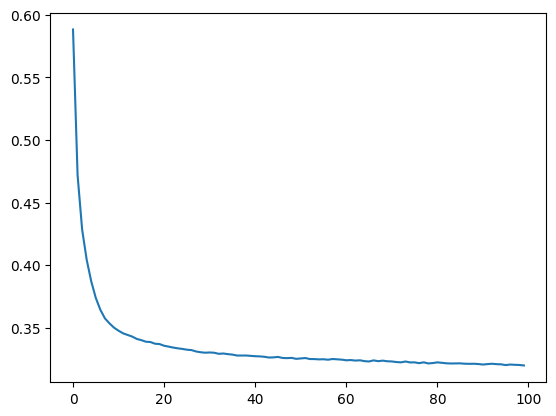

In [30]:
plt.plot(history.history['loss'])

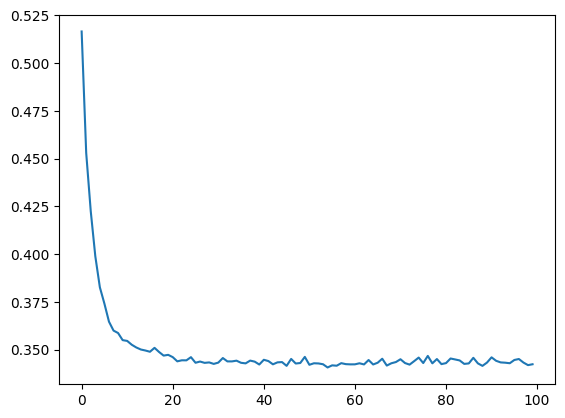

In [31]:
plt.plot(history.history['val_loss'])

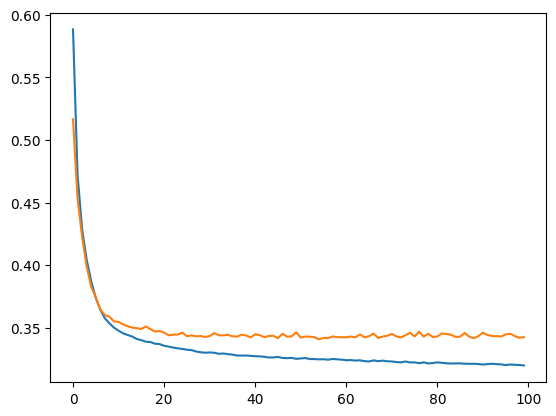

In [32]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

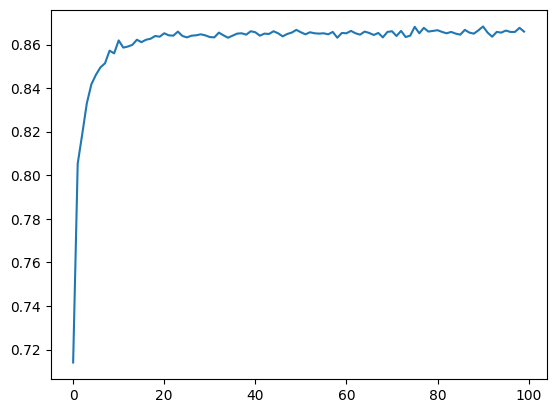

In [35]:
plt.plot(history.history['accuracy'])

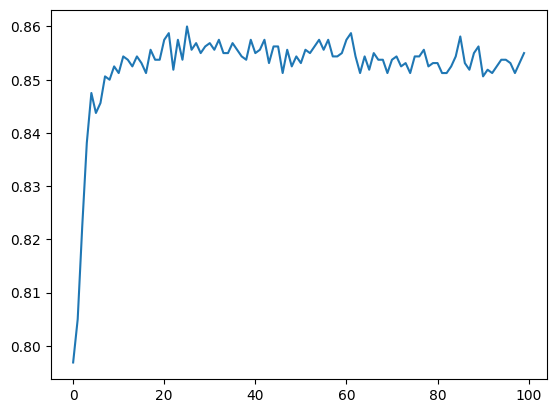

In [36]:
plt.plot(history.history['val_accuracy'])

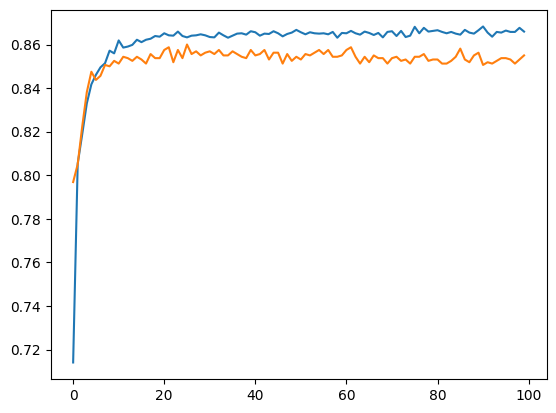

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])